In [12]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier


In [3]:
# Load dataset
df = pd.read_csv('datasets/student_mental_health_dataset.csv')  # ganti dengan nama file kamu

# Tampilkan 5 baris pertama
print(df.head())

# Cek info umum
print(df.info())

# Cek jumlah nilai unik dan missing value
print(df.nunique())
print(df.isnull().sum())

   Age  Gender  Sleep_Hours  Screen_Time_Hours  Study_Hours  \
0   24  Female          6.8                3.2          5.3   
1   21    Male          4.5                5.8          3.0   
2   22    Male          7.1                3.0          2.2   
3   24    Male          7.4                7.5          2.4   
4   20    Male          7.3                6.2          3.3   

   Physical_Activity_Minutes Diet_Quality  Mood_Rating  Stress_Level  \
0                         97         Good            9             8   
1                         64         Poor            8             6   
2                         30      Average           10             7   
3                         29         Poor            9             7   
4                        111         Poor            1             6   

  Mental_Health_Status  
0              Healthy  
1            Unhealthy  
2              Healthy  
3            Unhealthy  
4              Healthy  
<class 'pandas.core.frame.DataFrame'>


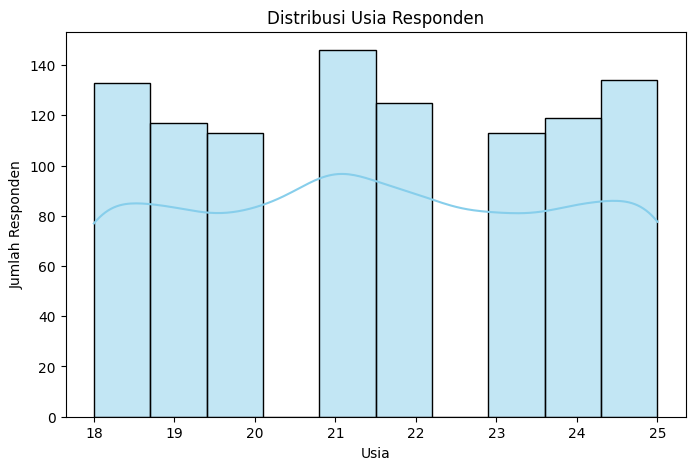

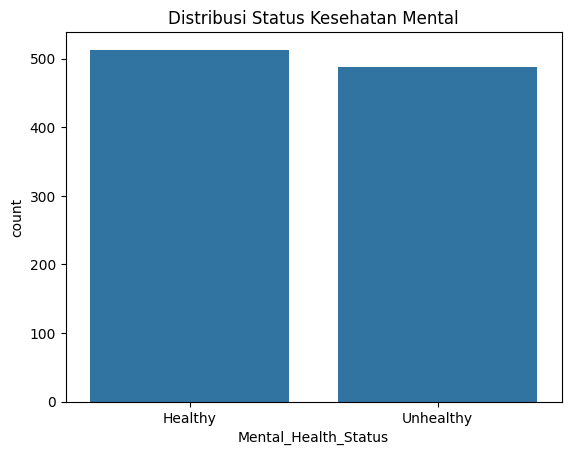

             Age  Sleep_Hours  Screen_Time_Hours  Study_Hours  \
count  1000.0000  1000.000000        1000.000000   1000.00000   
mean     21.4980     6.649200           6.026600      3.98310   
std       2.3081     1.483543           1.940561      1.55736   
min      18.0000     2.100000          -0.000000     -0.50000   
25%      19.7500     5.700000           4.700000      2.90000   
50%      21.0000     6.600000           6.000000      4.00000   
75%      24.0000     7.600000           7.300000      5.00000   
max      25.0000    11.300000          12.300000      9.90000   

       Physical_Activity_Minutes  Mood_Rating  Stress_Level  
count                1000.000000  1000.000000   1000.000000  
mean                   58.158000     5.592000      5.404000  
std                    34.080882     2.965524      2.949149  
min                     0.000000     1.000000      1.000000  
25%                    28.000000     3.000000      3.000000  
50%                    57.000000     6.000

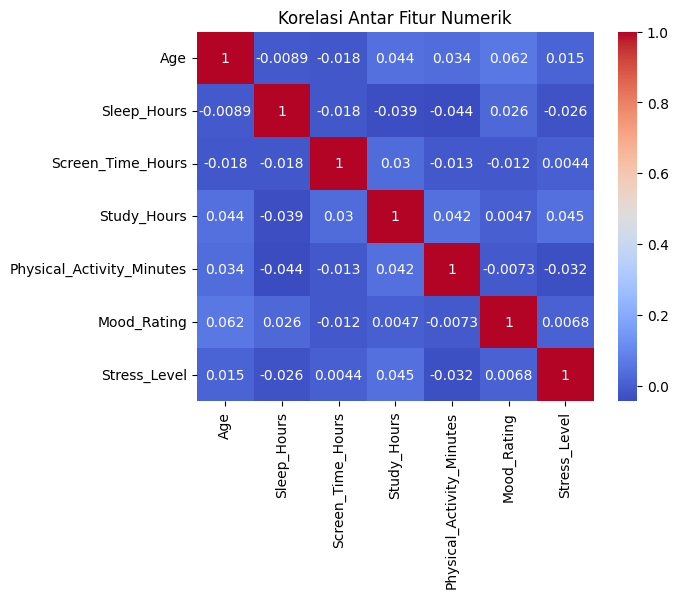

In [4]:
# Distribusi target

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Usia Responden")
plt.xlabel("Usia")
plt.ylabel("Jumlah Responden")
plt.show()


sns.countplot(data=df, x='Mental_Health_Status')
plt.title("Distribusi Status Kesehatan Mental")
plt.show()

# Statistik deskriptif numerik
print(df.describe())

# Korelasi numerik
numerical_features = df.select_dtypes(include='number')
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

In [5]:
# Salin dataframe untuk preprocessing
df_clean = df.copy()

# Encode Gender dan Diet_Quality
df_clean['Gender'] = LabelEncoder().fit_transform(df_clean['Gender'])
df_clean['Diet_Quality'] = LabelEncoder().fit_transform(df_clean['Diet_Quality'])

# Encode target
df_clean['Mental_Health_Status'] = df_clean['Mental_Health_Status'].map({'Healthy': 0, 'Unhealthy': 1})

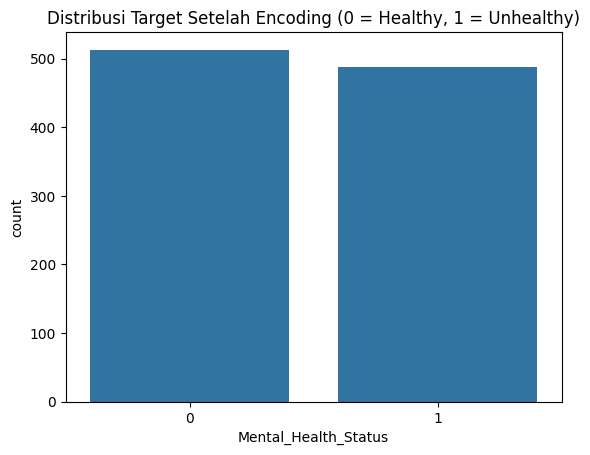

In [6]:
sns.countplot(x='Mental_Health_Status', data=df_clean)
plt.title('Distribusi Target Setelah Encoding (0 = Healthy, 1 = Unhealthy)')
plt.show()

In [7]:
X = df_clean.drop('Mental_Health_Status', axis=1)
y = df_clean['Mental_Health_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mental_Health_Status
Healthy      0.513
Unhealthy    0.487
Name: proportion, dtype: float64

Mulai modelling menggunakan random forest

In [21]:


# Model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = rf_model.predict(X_test_scaled)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55       103
           1       0.49      0.43      0.46        97

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200


Confusion Matrix:
 [[60 43]
 [55 42]]


In [22]:
df['Mental_Health_Status'].value_counts(normalize=True)


Mental_Health_Status
Healthy      0.513
Unhealthy    0.487
Name: proportion, dtype: float64

<Axes: xlabel='Mental_Health_Status', ylabel='Sleep_Hours'>

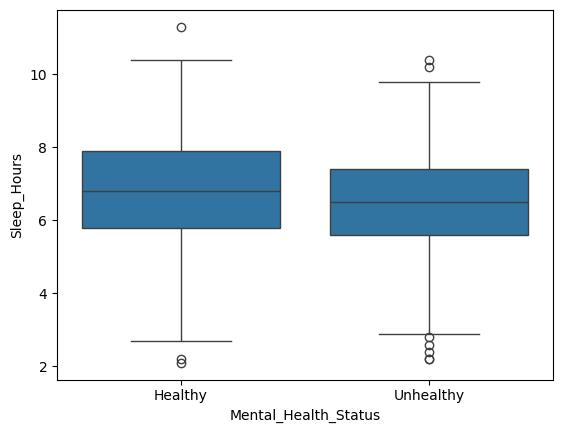

In [23]:
sns.boxplot(data=df, x='Mental_Health_Status', y='Sleep_Hours')

Featuring engineer

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Asumsikan df sudah dimuat dan Mental_Health_Status dalam format 0/1
df['Sleep_Deficit'] = 8 - df['Sleep_Hours']
df['Screen_Study_Ratio'] = df['Screen_Time_Hours'] / (df['Study_Hours'] + 1e-3)
df['Activity_Efficiency'] = df['Physical_Activity_Minutes'] / df['Sleep_Hours']
df['Mood_Stress_Gap'] = df['Mood_Rating'] - df['Stress_Level']
df['Is_Active'] = (df['Physical_Activity_Minutes'] >= 60).astype(int)
df['Is_Under_Slept'] = (df['Sleep_Hours'] < 6.5).astype(int)

# Encode kategori
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])     # Female = 0, Male = 1
df['Diet_Quality'] = label_enc.fit_transform(df['Diet_Quality'])  # Poor=0, Good=1, Excellent=2, dst.

# Target & fitur
X = df.drop('Mental_Health_Status', axis=1)
y = df['Mental_Health_Status'].map({'Healthy': 1, 'Unhealthy': 0})  # Jika masih string

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = rf.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

🎯 Accuracy: 0.545

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.46      0.50       101
           1       0.53      0.64      0.58        99

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.55      0.54       200


🔢 Confusion Matrix:
 [[46 55]
 [36 63]]


In [26]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=params,
                            n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

search.fit(X_train, y_train)
best_rf = search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))

Tuned Accuracy: 0.51


In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

d:\PROJECT\SIB DBS FOUNDATION\submission 1 ml terapan\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [22:45:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.515
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       101
           1       0.51      0.58      0.54        99

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200

[[46 55]
 [42 57]]
